In [2]:
%matplotlib inline
from d2l import torch as d2l
import torch
from torch.distributions import multinomial

In [6]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 0., 0., 1.])

In [7]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 1., 1., 3., 2.])

In [8]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1540, 0.1460, 0.1580, 0.1770, 0.1900, 0.1750])

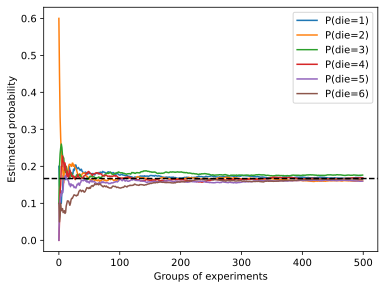

In [22]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),  label=("P(die=" + str(i+1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()